2.5577284786842453e-245

# Comparison of Models

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
# To Enable plotting graphs in Jupyter Notebook
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:

data=pd.read_csv("wine.xls",names=['Cultivator','Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoids','Proanth','Color','Hue','Od','Proline'])

In [6]:
data.head()

,Cultivator,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,Od,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
y=data["Cultivator"]
x=data.drop(columns="Cultivator")
x_std=StandardScaler().fit_transform(x)      
# scaling of Input, don't scale output(because it is categorical), we can also use Z score, this is another method


x_train,x_test,y_train,y_test= train_test_split(x_std,y,test_size=0.3,random_state=2)

In [23]:
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
dtmodel=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model=GaussianNB()
lrmodel=LogisticRegression()


In [24]:
model.fit(x_train,y_train)
dtmodel.fit(x_train,y_train)
lrmodel.fit(x_train,y_train)
rfmodel.fit(x_train,y_train)

ypred=model.predict(x_test)

In [25]:
metrics.accuracy_score(y_test,ypred)

0.9629629629629629

In [26]:
pd.crosstab(y_test,ypred)

col_0,1,2,3
Cultivator,,,
1,19,1,0
2,0,20,0
3,0,1,13


In [17]:
print(metrics.confusion_matrix(y_test,ypred))

[[19  1  0]
 [ 0 20  0]
 [ 0  1 13]]


In [27]:
models=[]
models.append(('Decision Tree',dtmodel))
models.append(('Random Forest',rfmodel))
models.append(('Naives Bayes / Gaussian',model))
models.append(('Logistic Regression',lrmodel))


Decision Tree: 0.864921 ,(variance error is 0.059962)
Random Forest: 0.898889 ,(variance error is 0.073063)
Naives Bayes / Gaussian: 0.932698 ,(variance error is 0.028405)
Logistic Regression: 0.955397 ,(variance error is 0.037611)


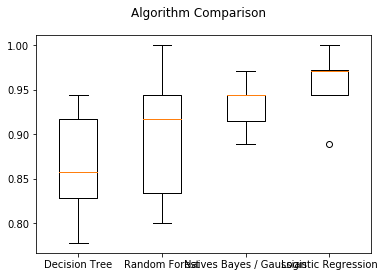

In [28]:
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f ,(variance error is %f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()